In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from tqdm import tqdm_notebook,tnrange,tqdm_pandas,tqdm

import os
from dateutil import parser
import cPickle as pickle

# %matplotlib nbagg
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import animation
from IPython.core.display import HTML
%matplotlib inline
import timeit


import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
#notify if cell is finished for cells taking longer than 30 seconds
%autonotify -a 30

<IPython.core.display.Javascript object>

In [ ]:
plt.rcParams['figure.figsize'] = (20,20)

In [3]:
## ONLY RUN IF DATA IS NOT CLEAN 
# with open('urinal-data-28-nov.csv','r') as raw, open('urinal-data-28-nov_clean.csv', 'a') as clean_f:
#     for line in raw:
#         if(len(line.split(',')) != 65):
#             print(len(line))
#         else:
#             clean_f.write(line)

In [ ]:
pickle_name = "urinal-data-28-nov_clean.p"
pickle_path = "F:\\Research\\ben\\grideye_urinal"
pickle_full = os.path.join(pickle_path, pickle_name)
print("looking in", pickle_full)

In [86]:
       
#---------- read in pick or read csv, cleanup, and create pickle----------   
if os.path.isfile(pickle_full):
    print("loading pickle")
    df = pd.read_pickle(pickle_full)
else:
    print("creating pickle...")
    print("this will take some time...")
    df = pd.read_csv("urinal-data-28-nov_clean.csv")
    df.columns = ["time"]+["P"+str(x) for x in range(64)]
    
    # remove dirty data
    df = df[[(x[:2] != "TT") for x in df["time"]]]
    df = df[[x[16:18] != ":S" for x in df["time"]]]
        
    # drop indexes where camera had fallen down/face was in camera
    df = df.drop(range(0,97710), axis=0) #drop row
    df = df.set_index('time')
    
    #flip image
    cols = []
    for y in range(7,-1,-1):
        for x in range(8):
            cols.append(x*8+y) 
    cols = ["P"+str(x) for x in cols] 
    df = df.reindex(columns=cols)
   
    # reset column names
    df.columns = ["P"+str(x) for x in range(64)]
    
    
    
    df.to_pickle(pickle_full)


loading pickle


<IPython.core.display.Javascript object>

In [469]:
df.head().reset_index()

,time,P0,P1,P2,P3,P4,P5,P6,P7,P8,...,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63
0,Thu Nov 23 03:44:14 2017,22.50,23.75,22.00,22.00,23.50,23.75,23.50,22.25,22.75,...,24.00,21.75,23.00,24.25,23.50,23.00,23.75,24.25,23.00,23.00
1,Thu Nov 23 03:44:14 2017,22.75,23.50,22.75,22.75,24.00,24.50,23.25,24.00,23.25,...,23.25,22.25,22.75,23.50,23.50,23.50,23.00,24.50,24.25,22.75
2,Thu Nov 23 03:44:14 2017,23.00,24.00,23.25,22.50,23.00,23.50,24.00,22.25,23.75,...,22.75,22.50,23.25,23.50,24.00,23.25,23.25,24.00,23.50,23.00
3,Thu Nov 23 03:44:14 2017,23.50,23.50,22.50,22.50,23.25,23.75,22.50,23.75,23.25,...,22.00,23.00,23.50,24.50,25.25,22.75,24.75,22.75,22.50,25.00
4,Thu Nov 23 03:44:14 2017,23.25,24.00,23.25,22.75,23.00,24.25,23.25,23.25,23.00,...,22.75,23.75,23.50,24.75,23.25,23.00,25.00,25.50,22.25,22.50


# Animate A person walking to the middle

<IPython.core.display.Javascript object>


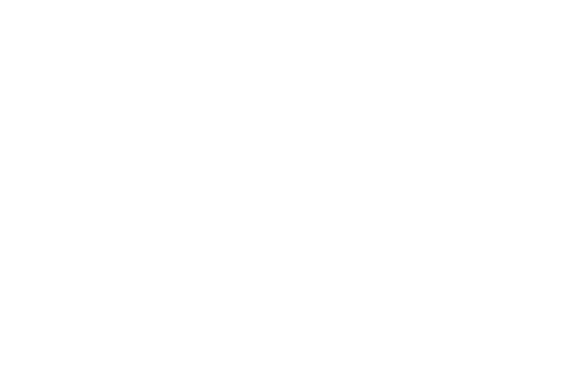

<IPython.core.display.Javascript object>


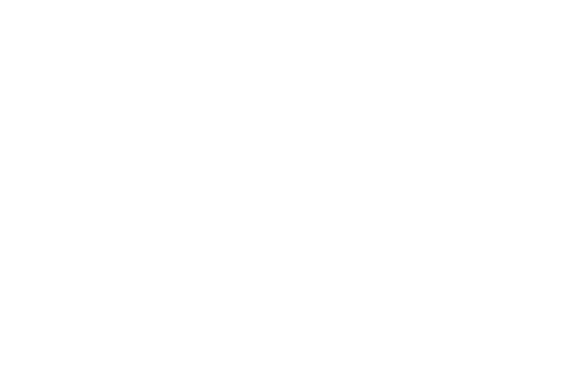

In [187]:
# Person walking to middle: walk in - 9911 , walk out - 10198
frames = []
for row in df.iloc[9911:10198].iterrows():
        frames.append(np.array(row[1:]).reshape(8,8).astype('float'))
        
# frames = np.array(df.iloc[9910]).reshape(8,8).astype('float')
# frames
sns.heatmap(frames[1], vmin=22, vmax=25)
# df.iloc[132]

<IPython.core.display.Javascript object>


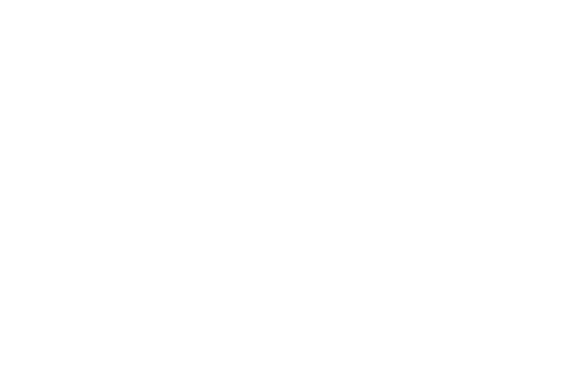

<IPython.core.display.Javascript object>


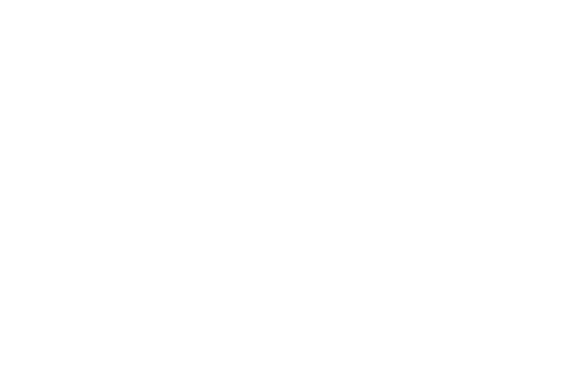

In [141]:
# Low res animation
%matplotlib nbagg

fig = plt.figure()


def init():
    sns.heatmap(np.zeros((8, 8)),vmin=23.5,vmax=25)

def animate(i):
    plt.clf()
    data = frames[i]
    sns.heatmap(data, vmin=23.5,vmax=27)

anim = animation.FuncAnimation(fig, animate, init_func=init, interval=10,blit=True)
# HTML(anim.to_html5_video())

# Grab Urinal sections

In [263]:
height = 6
n = 8
width_left = 2
width_middle = 3
width_right = 3

left_mask   = []
middle_mask = []
right_mask  = []
for y in range(n-height,n):
    # LEFT
    for x in range(width_left):
        left_mask.append(x+y*n) 
    # MIDDLE
    for x in range(width_middle):
         middle_mask.append(x+y*n+width_left) 
    # RIGHT
    for x in range(width_right):
         right_mask.append(x+y*n+width_left+width_middle) 

left_mask = ["P"+str(x) for x in left_mask]  
middle_mask = ["P"+str(x) for x in middle_mask]  
right_mask = ["P"+str(x) for x in right_mask]  

In [143]:
df.head()[middle_mask]

,P18,P19,P20,P26,P27,P28,P34,P35,P36,P42,P43,P44,P50,P51,P52,P58,P59,P60
time,,,,,,,,,,,,,,,,,,
Thu Nov 23 03:44:14 2017,23.50,23.50,23.75,23.25,24.25,23.50,22.75,22.50,23.50,22.25,23.75,23.25,23.75,23.25,22.25,23.50,23.00,23.75
Thu Nov 23 03:44:14 2017,23.25,24.25,23.00,24.25,23.75,23.75,24.50,23.25,23.50,23.25,23.00,22.25,23.75,23.25,23.75,23.50,23.50,23.00
Thu Nov 23 03:44:14 2017,23.75,25.00,23.25,23.50,23.75,23.25,23.00,23.50,23.25,22.75,22.75,23.00,23.25,23.00,24.00,24.00,23.25,23.25
Thu Nov 23 03:44:14 2017,23.00,24.25,23.25,24.50,23.50,23.50,23.00,23.75,23.50,22.75,23.00,22.75,24.00,24.25,23.25,25.25,22.75,24.75
Thu Nov 23 03:44:14 2017,24.00,24.50,23.75,24.00,24.25,24.25,23.25,23.25,23.75,22.75,23.25,23.25,24.25,23.00,24.00,23.25,23.00,25.00


# Take Temperature Threshold Each Urinal

In [264]:
%%notify
# Which threshold do you want?

### --- temperature average that is considered to be a person --- ###
threshold = 24.0
### ------------------------------------------------------------- ###

pickle_name1 = 'df_tempMeans_'+str(threshold)[0:2]+'_'+str(threshold)[3]+'.p'
pickle_name2 = 'df_tempMeans_thresh_'+str(threshold)[0:2]+'_'+str(threshold)[3]+'.p'


if os.path.isfile(pickle_name1) and os.path.isfile(pickle_name2):
    print("loading pickles")
    df_tempMeans = pd.read_pickle(pickle_name1)
    df_tempMeans_thresh = pd.read_pickle(pickle_name2)
else:
    print("creating pickle...")
    print("this will take some time...")
    
    left  = df[left_mask].apply(np.mean,axis=1)
    middle = df[middle_mask].apply(np.mean,axis=1)
    right = df[right_mask].apply(np.mean,axis=1)
    df_tempMeans = pd.concat([left, middle,right], axis=1)
    
    # threshold
    df_tempMeans_thresh = (df_tempMeans > threshold).astype(int)
    
    df_tempMeans.to_pickle(pickle_name1)
    df_tempMeans_thresh.to_pickle(pickle_name2)
    

loading pickles


<IPython.core.display.Javascript object>

# Differentiate Binary Threshold Columnwise

In [405]:
print("Differentiating df_tempMeans_thresh" )
df_temp_diff = df_tempMeans_thresh.diff()[1:]
print("complete")

Differentiating df_tempMeans_thresh
complete


In [460]:
df_temp_diff_redL = df_temp_diff.iloc[:,0][df_temp_diff.iloc[:,0] != 0].reset_index()
df_temp_diff_redM = df_temp_diff.iloc[:,1][df_temp_diff.iloc[:,1] != 0].reset_index()
df_temp_diff_redR = df_temp_diff.iloc[:,2][df_temp_diff.iloc[:,2] != 0].reset_index()
df_temp_diff_redL.head()

,time,0
0,Thu Nov 23 03:51:56 2017,1.0
1,Thu Nov 23 03:51:56 2017,-1.0
2,Thu Nov 23 03:51:56 2017,1.0
3,Thu Nov 23 03:51:57 2017,-1.0
4,Thu Nov 23 03:51:57 2017,1.0


# Convert Time to Epoch

In [461]:
df_temp_diff_redL.columns = ["time","in_out"]
df_temp_diff_redM.columns = ["time","in_out"]
df_temp_diff_redR.columns = ["time","in_out"]

df_temp_diff_redM.head()

,time,in_out
0,Thu Nov 23 03:58:39 2017,1.0
1,Thu Nov 23 03:58:39 2017,-1.0
2,Thu Nov 23 03:59:10 2017,1.0
3,Thu Nov 23 03:59:10 2017,-1.0
4,Thu Nov 23 04:02:06 2017,1.0


In [462]:

def in_out(b):
    if int(b) == 1:
        return "in"
    elif int(b) == -1:
        return "out"
    else:
        return b
    

# df_temp_diff_red.iloc[:,1].apply(time2epoch)
df_temp_diff_redL["in_out"]    = df_temp_diff_redL["in_out"].apply(in_out)
df_temp_diff_redL["time"]    = df_temp_diff_redL["time"].apply(pd.to_datetime)
df_temp_diff_redL["Position"] = ["Left" for x in range(len(df_temp_diff_redL))]

df_temp_diff_redM["in_out"]    = df_temp_diff_redM["in_out"].apply(in_out)
df_temp_diff_redM["time"]    = df_temp_diff_redM["time"].apply(pd.to_datetime)
df_temp_diff_redM["Position"] = ["Middle" for x in range(len(df_temp_diff_redM))]

df_temp_diff_redR["in_out"]    = df_temp_diff_redR["in_out"].apply(in_out)
df_temp_diff_redR["time"]    = df_temp_diff_redR["time"].apply(pd.to_datetime)
df_temp_diff_redR["Position"] = ["Right" for x in range(len(df_temp_diff_redR))]




df_temp_diff_redL.head()

,time,in_out,Position
0,2017-11-23 03:51:56,in,Left
1,2017-11-23 03:51:56,out,Left
2,2017-11-23 03:51:56,in,Left
3,2017-11-23 03:51:57,out,Left
4,2017-11-23 03:51:57,in,Left


In [463]:
# df_temp_diff_redL["time"]    = df_temp_diff_redL["time"].apply(pd.to_datetime)
df_temp_diff_redL.head()

,time,in_out,Position
0,2017-11-23 03:51:56,in,Left
1,2017-11-23 03:51:56,out,Left
2,2017-11-23 03:51:56,in,Left
3,2017-11-23 03:51:57,out,Left
4,2017-11-23 03:51:57,in,Left


In [466]:

sorted_visits = df_temp_diff_redL
sorted_visits = sorted_visits.append(df_temp_diff_redM)
sorted_visits = sorted_visits.append(df_temp_diff_redR)
sorted_visits = sorted_visits.set_index("time")
# sorted_visits .sample(20)


sorted_visits.sort_index(inplace=True)
# sorted_visits

,in_out,Position
time,,
2017-11-23 03:51:56,in,Left
2017-11-23 03:51:56,out,Left
2017-11-23 03:51:56,in,Left
2017-11-23 03:51:57,out,Left
2017-11-23 03:51:57,in,Left
2017-11-23 03:51:57,in,Left
2017-11-23 03:51:57,in,Left
2017-11-23 03:51:57,out,Left
2017-11-23 03:51:57,out,Left


In [453]:
test.index.to_datetime(dayfirst=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


DatetimeIndex(['2017-11-24 02:09:33', '2017-11-27 00:45:28',
               '2017-11-27 02:32:42', '2017-11-27 04:56:30',
               '2017-11-24 00:24:17', '2017-11-27 00:54:46',
               '2017-11-26 23:44:24', '2017-11-24 01:08:49',
               '2017-11-27 22:16:45', '2017-11-24 05:50:20',
               '2017-11-27 00:50:22', '2017-11-23 23:49:02',
               '2017-11-27 04:03:57', '2017-11-27 04:46:17',
               '2017-11-27 06:39:51', '2017-11-27 02:37:55',
               '2017-11-24 00:20:39', '2017-11-24 05:25:25',
               '2017-11-27 07:27:43', '2017-11-27 01:01:49'],
              dtype='datetime64[ns]', freq=None)

In [300]:
print("creating pickle...")
print("this will take some time...")
# Variable initialisation    
walk_in = 1
walk_out = -1
stay = 0

left   = 1
middle = 3
right  = 5

#keep track of last non-stay state and the index/time respectively
left_state_out= 0; middle_state_out= 0; right_state_out=0
left_state_in = 0; middle_state_in = 0; right_state_in =0


states_left_in = [];       states_middle_in = [];       states_right_in = []    
states_left_out = [];      states_middle_out = [];      states_right_out = []    
states_left_in_time = [];  states_middle_in_time = [];  states_right_in_time = []    
states_left_out_time = []; states_middle_out_time = []; states_right_out_time = []    

for t in tnrange(len(df_temp_diff_red)):

    #test left
    if df_temp_diff_red.iloc[t,left] == stay:
        pass
    elif df_temp_diff_red.iloc[t,left] == walk_out:
        left_state_out = t
        states_left_in.append(left_state_in)
        states_left_out.append(left_state_out)

        states_left_in_time.append(df_temp_diff_red.iloc[t,left-1])
        states_left_out_time.append(df_temp_diff_red.iloc[t,left-1])

    elif df_temp_diff_red.iloc[t,left] == walk_in:
        left_state_in = t

creating pickle...
this will take some time...


Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [301]:
states_left_in

[1,
 3,
 6,
 9,
 11,
 13,
 16,
 19,
 21,
 24,
 27,
 30,
 33,
 36,
 39,
 42,
 45,
 49,
 53,
 57,
 61,
 65,
 67,
 70,
 73,
 76,
 78,
 82,
 86,
 89,
 91,
 93,
 96,
 99,
 102,
 105,
 108,
 110,
 112,
 115,
 118,
 121,
 125,
 128,
 131,
 133,
 136,
 139,
 142,
 145,
 148,
 150,
 153,
 156,
 159,
 162,
 165,
 167,
 170,
 173,
 176,
 179,
 182,
 185,
 188,
 191,
 194,
 197,
 200,
 203,
 206,
 209,
 212,
 214,
 217,
 221,
 223,
 227,
 230,
 232,
 236,
 240,
 242,
 245,
 248,
 251,
 254,
 257,
 260,
 263,
 266,
 269,
 272,
 275,
 277,
 280,
 283,
 285,
 287,
 291,
 294,
 298,
 301,
 304,
 307,
 310,
 314,
 318,
 321,
 325,
 328,
 331,
 334,
 338,
 342,
 346,
 349,
 352,
 355,
 357,
 361,
 364,
 368,
 372,
 376,
 380,
 384,
 387,
 389,
 392,
 395,
 398,
 402,
 406,
 410,
 413,
 416,
 418,
 421,
 423,
 426,
 429,
 432,
 434,
 437,
 439,
 441,
 444,
 447,
 450,
 453,
 457,
 460,
 462,
 466,
 469,
 472,
 475,
 478,
 481,
 484,
 487,
 490,
 493,
 496,
 498,
 501,
 504,
 508,
 511,
 513,
 516,
 519,


In [ ]:
# Check all that all who entered also left
# assert df_temp_diff_red.iloc[:,0].sum() == False # <-- FAILS
# assert df_temp_diff_red.iloc[:,1].sum() == False # <-- FAILS
assert df_temp_diff_red.iloc[:,2].sum() == False

picklename = 'index_states'+str(threshold)[0:2]+'_'+str(threshold)[3]+'.p'

if os.path.isfile(picklename):
    print("loading pickles")
    index_states = pd.read_pickle(picklename)
else:
    print("creating pickle...")
    print("this will take some time...")
    # Variable initialisation    
    walk_in = 1
    walk_out = -1
    stay = 0

    left   = 1
    middle = 3
    right  = 5

    #keep track of last non-stay state and the index/time respectively
    left_state_out= 0; middle_state_out= 0; right_state_out=0
    left_state_in = 0; middle_state_in = 0; right_state_in =0


    states_left_in = [];       states_middle_in = [];       states_right_in = []    
    states_left_out = [];      states_middle_out = [];      states_right_out = []    
    states_left_in_time = [];  states_middle_in_time = [];  states_right_in_time = []    
    states_left_out_time = []; states_middle_out_time = []; states_right_out_time = []    
    
    for t in tnrange(len(df_temp_diff_red)):

        #test left
        if df_temp_diff_red.iloc[t,left] == stay:
            pass
        elif df_temp_diff_red.iloc[t,left] == walk_out:
            left_state_out = t
            states_left_in.append(left_state_in)
            states_left_out.append(left_state_out)
            
            states_left_in_time.append(df_temp_diff_red.iloc[t,left-1])
            states_left_out_time.append(df_temp_diff_red.iloc[t,left-1])

        elif df_temp_diff_red.iloc[t,left] == walk_in:
            left_state_in = t
    
        
        #test middle
        if df_temp_diff_red.iloc[t,middle] == stay:
            pass
        elif df_temp_diff_red.iloc[t,middle] == walk_out:
            middle_state_out = t
            states_middle_in.append(middle_state_in)
            states_middle_out.append(middle_state_out)
            
            states_middle_in_time.append(df_temp_diff_red.iloc[t,middle-1])
            states_middle_out_time.append(df_temp_diff_red.iloc[t,middle-1])
            
        elif df_temp_diff_red.iloc[t,middle] == walk_in:
            middle_state_in = t

            
        #test right
        if df_temp_diff_red.iloc[t,right] == stay:
            pass
        elif df_temp_diff_red.iloc[t,right] == walk_out:
            right_state_out = t
            states_right_in.append(right_state_in)
            states_right_out.append(right_state_out)
            
            states_right_in_time.append(df_temp_diff_red.iloc[t,right-1])
            states_right_out_time.append(df_temp_diff_red.iloc[t,right-1])
            
        elif df_temp_diff_red.iloc[t,right] == walk_in:
            right_state_in = t

    print("creating Dataframes")
    print("Left")
    states_left_in_df   = pd.DataFrame({'left_in': states_left_in})
    states_left_out_df   = pd.DataFrame({'left_out': states_left_out})
    states_left_in_time_df   = pd.DataFrame({'left_in_time': states_left_in_time})
    states_left_out_time_df   = pd.DataFrame({'left_out_time': states_left_out_time}) 

    print("Middle")
    states_middle_in_df = pd.DataFrame({'middle_state_in': states_middle_in})
    states_middle_out_df = pd.DataFrame({'middle_state_out': states_middle_out})
    states_middle_in_time_df   = pd.DataFrame({'middle_in_time': states_middle_in_time})
    states_middle_out_time_df   = pd.DataFrame({'middle_out_time': states_middle_out_time}) 

    print("Right")
    states_right_in_df  = pd.DataFrame({'right_state_in': states_right_in})                                    
    states_right_out_df  = pd.DataFrame({'right_state_out': states_right_out})
    states_right_in_time_df   = pd.DataFrame({'right_in_time': states_right_in_time})
    states_right_out_time_df   = pd.DataFrame({'right_out_time': states_right_out_time}) 

    
    index_states = pd.concat([states_left_in_df,states_left_out_df,states_middle_in_df,states_middle_out_df,states_right_in_df,states_right_out_df,
                             states_left_in_time_df, states_left_out_time_df, states_middle_in_time_df, states_middle_out_time_df,
                              states_right_in_time_df, states_right_out_time_df], ignore_index=True, axis=1)
    
    index_states.columns = ['left_in','left_out','middle_in','middle_out','right_in','right_out',
                            'left_in_time','left_out_time','middle_in_time','middle_out_time','right_in_time','right_out_time']
    
    print("Pickling")
    index_states.to_pickle(picklename)

# Collect In and Out Times (as indices)

# Add Time Length Columns

In [14]:
# index_states.loc[:,"left_in_time":]
# index_states.loc[:,"left_in_time"].apply(time2epoch)
index_states.loc[:,"left_in_time"]    = index_states.loc[:,"left_in_time"].apply(time2epoch)
index_states.loc[:,"left_out_time"]   = index_states.loc[:,"left_out_time"].apply(time2epoch)
index_states.loc[:,"middle_in_time"]  = index_states.loc[:,"middle_in_time"].apply(time2epoch)
index_states.loc[:,"middle_out_time"] = index_states.loc[:,"middle_out_time"].apply(time2epoch)
index_states.loc[:,"right_in_time"]   = index_states.loc[:,"right_in_time"].apply(time2epoch)
index_states.loc[:,"right_out_time"]  = index_states.loc[:,"right_out_time"].apply(time2epoch)
# for row in index_states.iloc[:,1:10].iterrows():
# #     print(row[1][6:])
#     index_states.iloc[row[0],6:] = time2epoch(index_states.iloc[row[0],6:])

In [15]:
index_states.head()

,left_in,left_out,middle_in,middle_out,right_in,right_out,left_in_time,left_out_time,middle_in_time,middle_out_time,right_in_time,right_out_time
0,0.0,7.0,0,4,38.0,39.0,1.511203e+09,1.511203e+09,1.511203e+09,1.511203e+09,1.511203e+09,1.511203e+09
1,8.0,9.0,6,8,41.0,767.0,1.511203e+09,1.511203e+09,1.511203e+09,1.511203e+09,1.511356e+09,1.511356e+09
2,10.0,11.0,10,11,768.0,780.0,1.511203e+09,1.511203e+09,1.511203e+09,1.511203e+09,1.511356e+09,1.511356e+09
3,13.0,14.0,12,13,781.0,1091.0,1.511203e+09,1.511203e+09,1.511203e+09,1.511203e+09,1.511356e+09,1.511356e+09
4,15.0,22.0,15,16,1092.0,1111.0,1.511203e+09,1.511203e+09,1.511203e+09,1.511203e+09,1.511356e+09,1.511356e+09


In [16]:
fs = 10.0 # 10 Hz sampling frequency
Ts = 1/fs
left_df = pd.DataFrame({'left_in': index_states["left_in"] ,'left_out': index_states["left_out"] ,
                        'left_length': Ts*(index_states["left_out"]- index_states["left_in"]),
                        'left_in_time': index_states["left_in_time"] ,'left_out_time': index_states["left_in_time"]})

middle_df = pd.DataFrame({'middle_in': index_states["middle_in"] ,'middle_out': index_states["middle_out"] ,
                        'middle_length': Ts*(index_states["middle_out"]- index_states["middle_in"]),
                        'middle_in_time': index_states["middle_in_time"] ,'middle_out_time': index_states["middle_in_time"]})

right_df = pd.DataFrame({'right_in': index_states["right_in"] ,'right_out': index_states["right_out"] ,
                        'right_length': Ts*(index_states["right_out"]- index_states["right_in"]),
                        'right_in_time': index_states["right_in_time"] ,'right_out_time': index_states["right_in_time"]})

In [17]:
left_df.head()

,left_in,left_in_time,left_length,left_out,left_out_time
0,0.0,1.511203e+09,0.7,7.0,1.511203e+09
1,8.0,1.511203e+09,0.1,9.0,1.511203e+09
2,10.0,1.511203e+09,0.1,11.0,1.511203e+09
3,13.0,1.511203e+09,0.1,14.0,1.511203e+09
4,15.0,1.511203e+09,0.7,22.0,1.511203e+09


# Remove Non-Stays

## Set Up Figure Parameters

In [20]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.mlab as mlab


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-small',
         'ytick.labelsize':'x-small'}
plt.rcParams.update(params)

# Histograms of Urinal Visit Length > 1 

In [21]:
stay_length = 1 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['left_length'].mean()
left_stay_std = left_stays['left_length'].std()
left_stay_norm = (left_stays['left_length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['middle_length'].mean()
middle_stay_std = middle_stays['middle_length'].std()
middle_stay_norm = (middle_stays['middle_length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['right_length'].mean()
right_stay_std = right_stays['right_length'].std()
# right_stay_med = right_stays['right_length'].median()
right_stay_norm = (right_stays['right_length'] - right_stay_mean)/right_stay_std


print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


left   - mean: 11.0886297376 std: 13.8080856093
middle - mean: 5.80340632603 std: 11.0042226076
right  - mean: 9.64193548387 std: 12.108809973
 


Text(94.6,203,u'$\\mu = 11.09$\n$\\sigma = 13.81$')

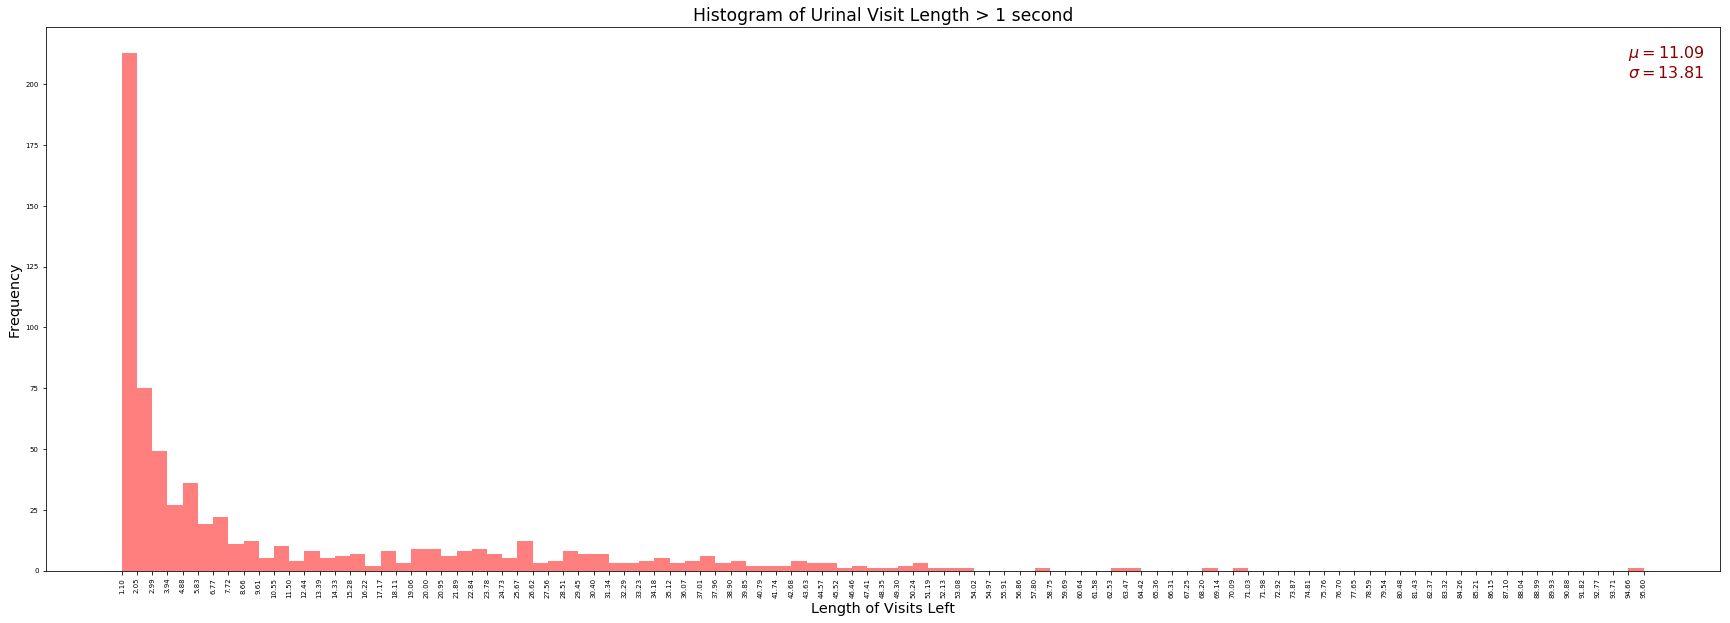

In [22]:

# the histogram of the data
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(left_stays["left_length"].T, bins=bins, facecolor='red', alpha=transp, histtype='bar')
ax.set_xticks(bins);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.xlabel('Length of Visits Left')
plt.ylabel('Frequency')
plt.title('Histogram of Urinal Visit Length > 1 second')


plt.text(max(left_stays["left_length"]) - 1, max(n)- 10, r'$\mu = {0:.2f}$'.format(left_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(left_stay_std), fontdict=font)


# Histograms of Urinal Visit Length > 5

In [23]:
stay_length = 5 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['left_length'].mean()
left_stay_std = left_stays['left_length'].std()
left_stay_norm = (left_stays['left_length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['middle_length'].mean()
middle_stay_std = middle_stays['middle_length'].std()
middle_stay_norm = (middle_stays['middle_length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['right_length'].mean()
right_stay_std = right_stays['right_length'].std()
# right_stay_med = right_stays['right_length'].median()
right_stay_norm = (right_stays['right_length'] - right_stay_mean)/right_stay_std


print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


left   - mean: 21.5593650794 std: 14.5354322056
middle - mean: 24.372972973 std: 15.83275863
right  - mean: 19.2131868132 std: 12.972158043
 


Text(94.6,36,u'$\\mu = 21.56$\n$\\sigma = 14.54$')

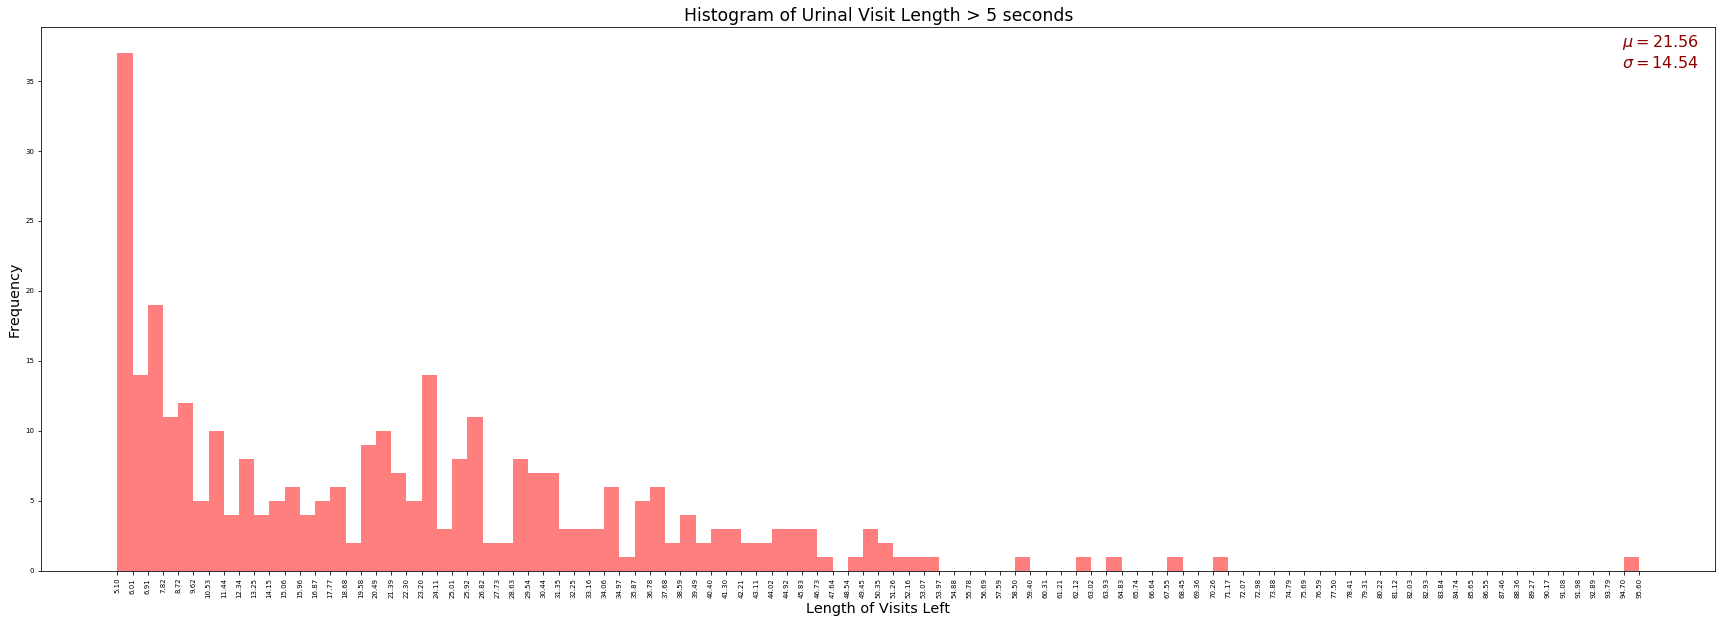

In [24]:
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(left_stays["left_length"].T, bins=bins, facecolor='red', alpha=transp, histtype='bar')
ax.set_xticks(bins);

plt.xlabel('Length of Visits Left')
plt.ylabel('Frequency')
plt.title('Histogram of Urinal Visit Length > 5 seconds')


plt.text(max(left_stays["left_length"]) - 1, max(n)- 1, r'$\mu = {0:.2f}$'.format(left_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(left_stay_std), fontdict=font)

# ax.xaxis.set_major_formatter(FormatStrFormatter('%0.5f'))

# Histograms of Urinal Visit Length > 8

In [25]:
stay_length = 8 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['left_length'].mean()
left_stay_std = left_stays['left_length'].std()
left_stay_norm = (left_stays['left_length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['middle_length'].mean()
middle_stay_std = middle_stays['middle_length'].std()
middle_stay_norm = (middle_stays['middle_length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['right_length'].mean()
right_stay_std = right_stays['right_length'].std()
# right_stay_med = right_stays['right_length'].median()
right_stay_norm = (right_stays['right_length'] - right_stay_mean)/right_stay_std


print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


left   - mean: 26.3836820084 std: 13.4755156681
middle - mean: 28.9372881356 std: 14.5177287374
right  - mean: 23.2666666667 std: 12.395610717
 


Text(94.6,13,u'$\\mu = 26.38$\n$\\sigma = 13.48$')

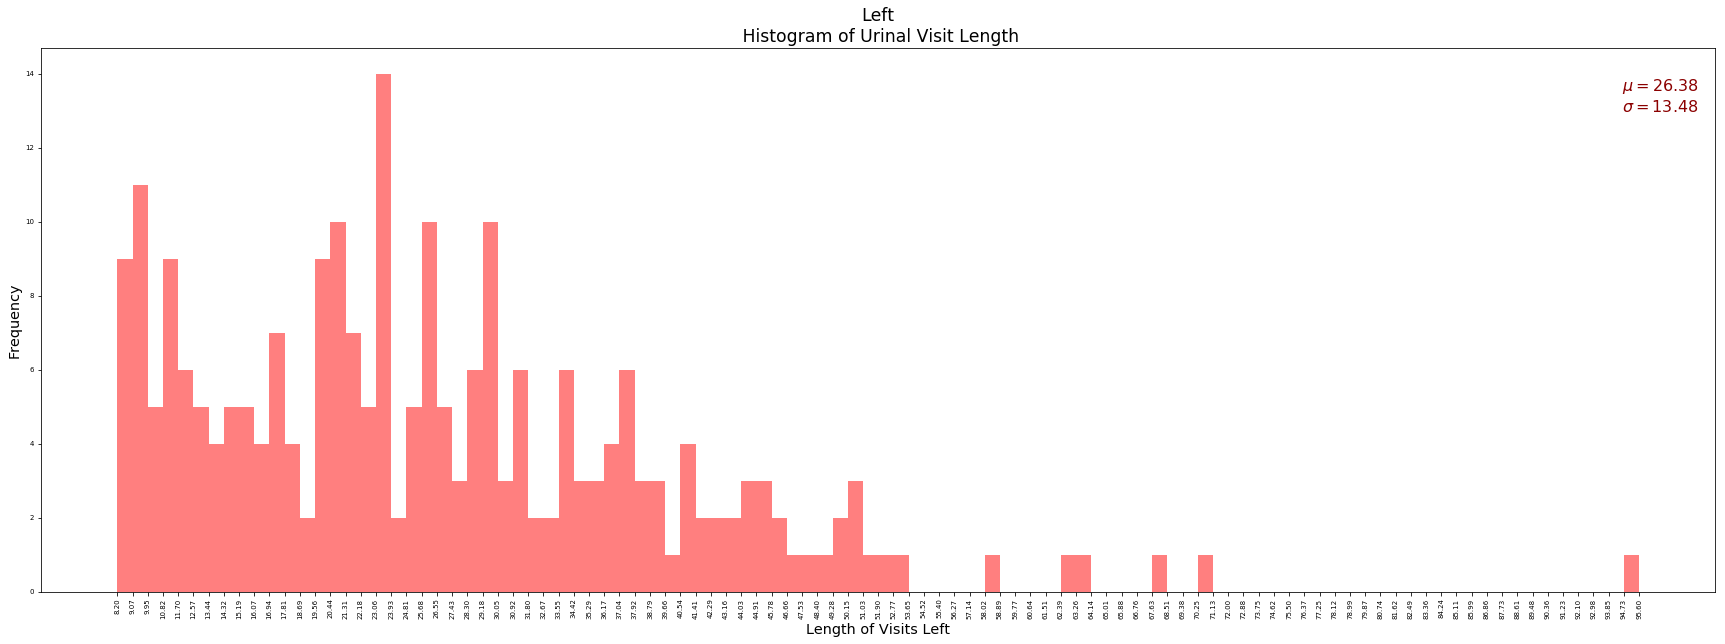

In [26]:
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(left_stays["left_length"].T, bins=bins, facecolor='red', alpha=transp, histtype='bar')
ax.set_xticks(bins);

plt.xlabel('Length of Visits Left')
plt.ylabel('Frequency')
# plt.title('Histogram of Urinal Visit Length > 8 seconds')
plt.title('Left\n Histogram of Urinal Visit Length')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.text(max(left_stays["left_length"]) - 1, max(n)- 1, r'$\mu = {0:.2f}$'.format(left_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(left_stay_std), fontdict=font)
# mu = {} sigma = {}'.format(left_stay_mean,left_stay_std))
# ax.text(right, top, 'right bottom',
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform=ax.transAxes)

Text(94.3,3,u'$\\mu = 28.94$\n$\\sigma = 14.52$')

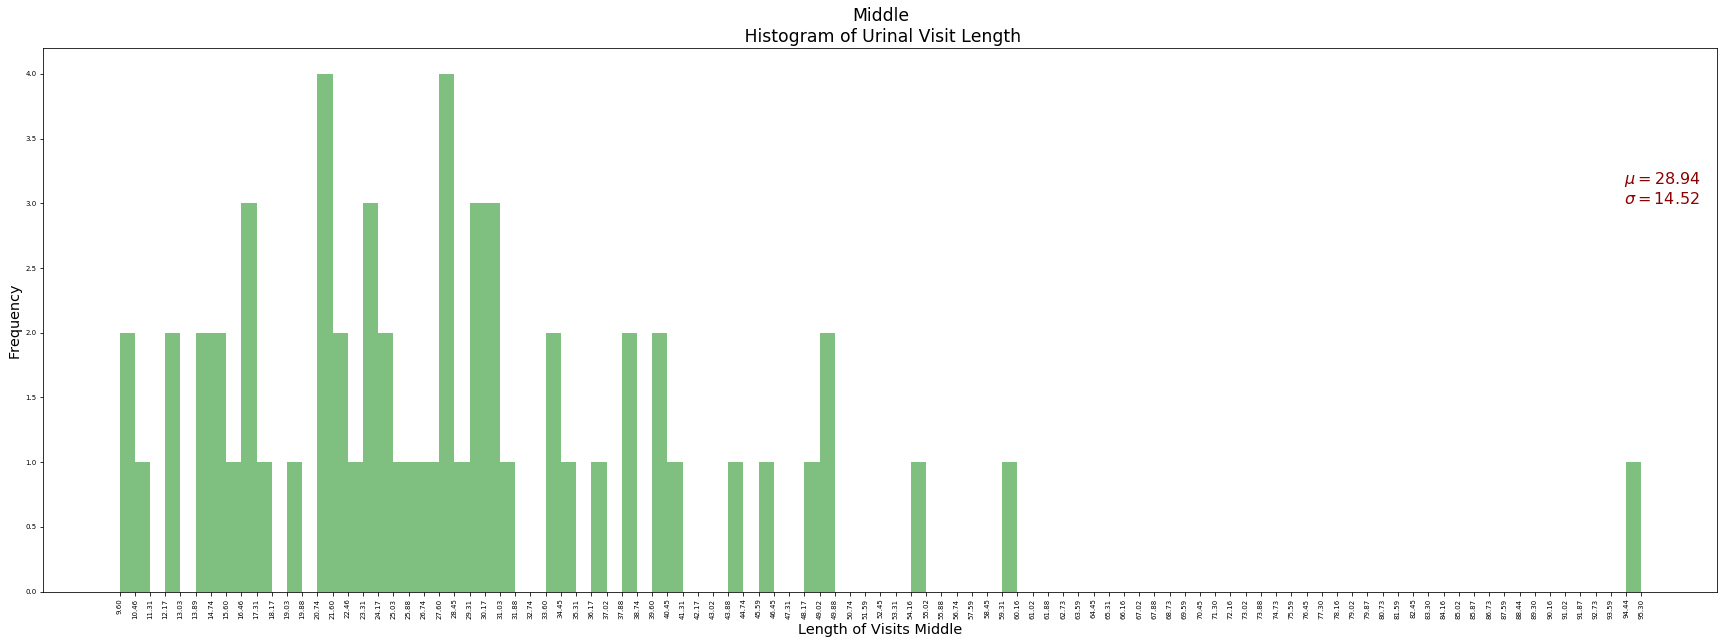

In [27]:
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(middle_stays["middle_length"].T, bins=bins, facecolor='green', alpha=transp, histtype='bar')
ax.set_xticks(bins);

plt.xlabel('Length of Visits Middle')
plt.ylabel('Frequency')
plt.title('Middle\n Histogram of Urinal Visit Length')
plt.text(max(middle_stays["middle_length"]) - 1 , max(n) - 1, r'$\mu = {0:.2f}$'.format(middle_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(middle_stay_std), fontdict=font)

Text(71.6,10,u'$\\mu = 23.27$\n$\\sigma = 12.40$')

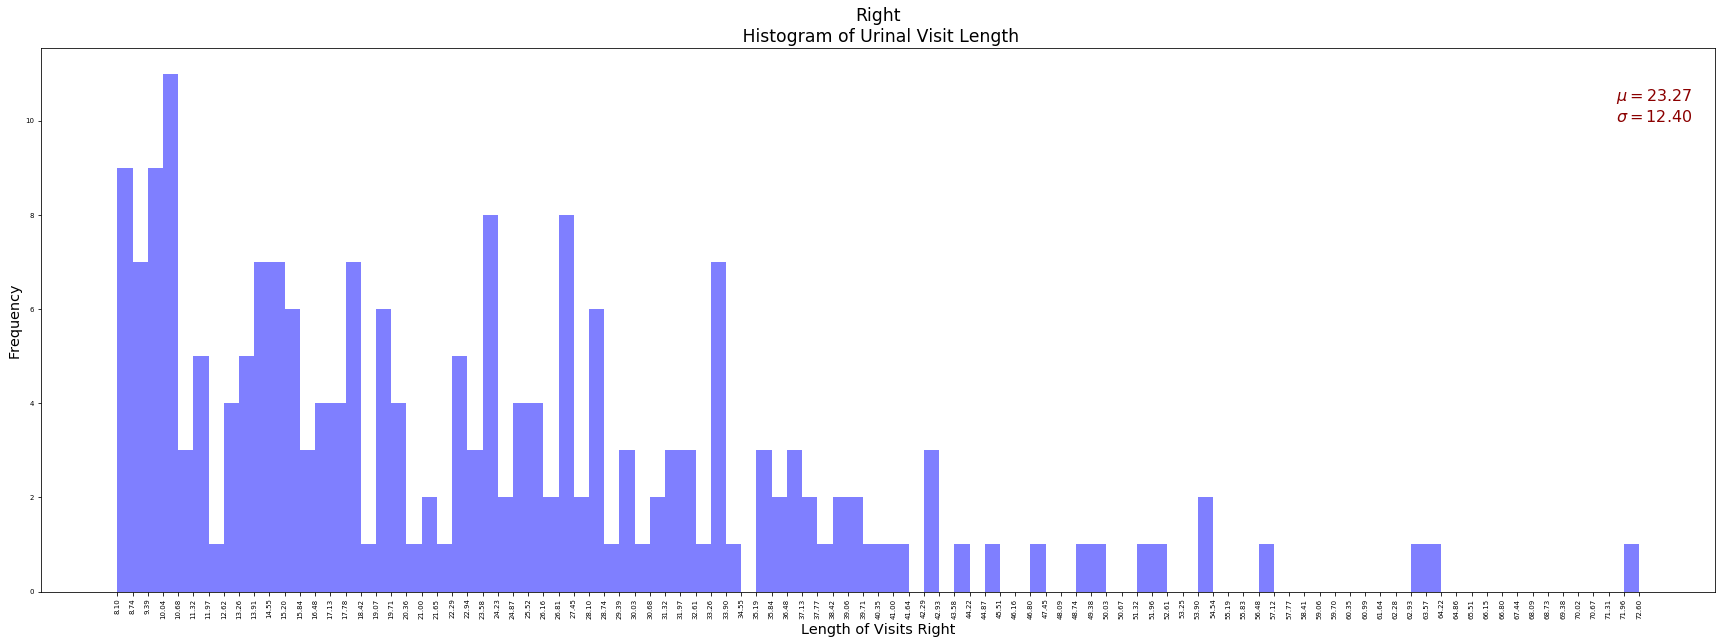

In [28]:
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(right_stays["right_length"].T, bins=bins, facecolor='blue', alpha=transp, histtype='bar')
ax.set_xticks(bins);


plt.xlabel('Length of Visits Right')
plt.ylabel('Frequency')
plt.title('Right\n Histogram of Urinal Visit Length')
plt.text(max(right_stays["right_length"]) - 1, max(n ) - 1, r'$\mu = {0:.2f}$'.format(right_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(right_stay_std), fontdict=font)

# Sort Data by index Into a 3 colum Dataframe: Ins&Outs, Position, and Index

In [29]:

print("left")
left_ins = pd.DataFrame({"Sort_Data":left_stays["left_in"],"In_Out":["in" for x in range(len(left_stays))],
                              "Position":["Left" for x in range(len(left_stays))],
                        "Time":left_stays["left_in_time"]})

left_outs = pd.DataFrame({"Sort_Data":left_stays["left_out"],"In_Out":["out" for x in range(len(left_stays))],
                              "Position":["Left" for x in range(len(left_stays))],
                        "Time":left_stays["left_out_time"]})


print("middle")
middle_ins = pd.DataFrame({"Sort_Data":middle_stays["middle_in"],"In_Out":["in" for x in range(len(middle_stays))],
                              "Position":["middle" for x in range(len(middle_stays))],
                        "Time":middle_stays["middle_in_time"]})
                           
middle_outs = pd.DataFrame({"Sort_Data":middle_stays["middle_out"],"In_Out":["out" for x in range(len(middle_stays))],
                              "Position":["middle" for x in range(len(middle_stays))],
                        "Time":middle_stays["middle_out_time"]})

print("right")                           
right_ins = pd.DataFrame({"Sort_Data":right_stays["right_in"],"In_Out":["in" for x in range(len(right_stays))],
                              "Position":["right" for x in range(len(right_stays))],
                        "Time":right_stays["right_in_time"]})                            
                            
right_outs = pd.DataFrame({"Sort_Data":right_stays["right_out"],"In_Out":["out" for x in range(len(right_stays))],
                              "Position":["right" for x in range(len(right_stays))],
                        "Time":right_stays["right_out_time"]})


left
middle
right


In [30]:

sorted_visits = left_ins
sorted_visits = sorted_visits.append(left_outs)

sorted_visits = sorted_visits.append(middle_ins)
sorted_visits = sorted_visits.append(middle_outs)
sorted_visits = sorted_visits.append(right_ins)
sorted_visits = sorted_visits.append(right_outs)
sorted_visits = sorted_visits.sort_values(by=['Sort_Data'])

In [31]:
sorted_visits.head()

,In_Out,Position,Sort_Data,Time
1,in,right,41.0,1.511356e+09
33,in,Left,164.0,1.511356e+09
19,in,middle,167.0,1.511356e+09
1,out,right,767.0,1.511356e+09
3,in,right,781.0,1.511356e+09


# Visits per Hour
## Function to convert epoch to hour (24 hour time)

In [32]:
def getepochhour(epoch):
    d = time.strftime('%H', time.gmtime(epoch))#sorted_visits["Time"].iloc[100]))
    return d

In [33]:
sorted_visits["hour"] = sorted_visits["Time"].apply(getepochhour)


## Get Walk Ins of Visits

In [35]:
in_times_hour = sorted_visits[sorted_visits['In_Out'] == 'in']["hour"]

In [36]:
in_times_hour.head()

1     13
33    13
19    13
3     13
52    13
Name: hour, dtype: object

In [106]:
hour_counts = np.zeros(24)
for i in range(len(in_times_hour)):
    hour_counts[int(in_times_hour.iloc[i])] += 1


## Plot Urinal Visits per Hour

Text(0.5,1,u'Urinal Visits Per Hour')

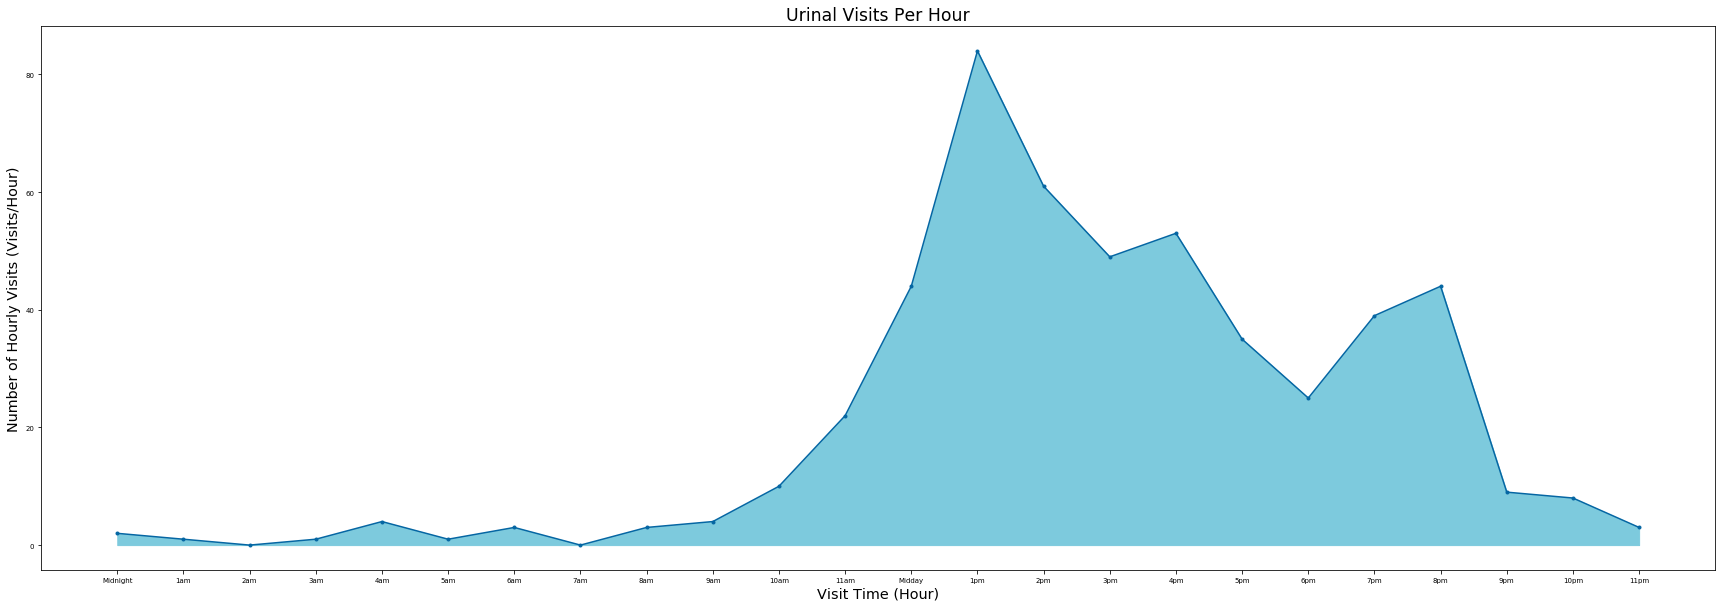

In [105]:
plt.rcParams['figure.figsize'] = (30,10)
visit_times = pd.DataFrame({"Hour Visited":hour_counts})
x = np.arange(0.0, 24, 1)

my_xticks = ["Midnight","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am",
             "Midday"  ,"1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
plt.xticks(range(24), my_xticks);
plt.plot(x, visit_times, marker='.', lw=1.5, color="#0566A3")
# plt.fill_between(visit_times,range(24))
# plt.plot(x, y, marker='.', lw=1)
d = np.zeros(len(visit_times))
plt.fill_between(x,visit_times.iloc[:,0],where=visit_times.iloc[:,0]>=d, interpolate=True, color='#7DCADD')#"#aee1ec")

plt.xlabel('Visit Time (Hour)')
plt.ylabel('Number of Hourly Visits (Visits/Hour)')
plt.title('Urinal Visits Per Hour')

# Get All state changes

In [42]:
sorted_visits.head()

,In_Out,Position,Sort_Data,Time,hour
1,in,right,41.0,1.511356e+09,13
33,in,Left,164.0,1.511356e+09,13
19,in,middle,167.0,1.511356e+09,13
1,out,right,767.0,1.511356e+09,13
3,in,right,781.0,1.511356e+09,13


## All Possible State Changes
We assume that only one person can walk in and out at a time.  
given a sampling rate of 10 Hz this is a pretty safe bet.  
We also ignore a "change" where the state remains the same
(this is covered by visit times).

We represent the empty urinal by __0__, and a person by __1__.  
So a state change from 1 person at the left Urinal to the empty state:  
        _100 &rarr; 000 = b100000_


In [109]:
# state_changes = {"000100"}

#----- empty to 1 person changes---

states_dec = [
int('100000',2),
int('010000',2),
int('001000',2),
int('000100',2),
int('000010',2),
int('000001',2),

#----- 1 person to 2 changes---
int('100110',2),
int('100101',2),
int('110100',2),
int('101100',2),

int('010110',2),
int('010011',2),
int('110010',2),
int('011010',2),

int('001011',2),
int('001101',2),
int('011001',2),
int('101001',2),

#----- 2 person to 3 changes---
int('011111',2),
int('101111',2),
int('110111',2),
int('111011',2),
int('111101',2),
int('111110',2)]

states_bin = [bin(states_dec[i])[2:].zfill(6) for i in range(len(states_dec))]

## Count All State Changes

In [44]:
state_changes_df = pd.DataFrame({"Count":np.zeros(len(states_bin)),"State Change":states_bin})
state_changes_df = state_changes_df.set_index("State Change")

curr_state = "000"
prev_state = "000"
state_change = None
for row in sorted_visits.iterrows():
    
    # Deteremine the current state
    pos =row[1][1]
    inout = row[1][0]
    
    #LIN
    if pos == "Left" and inout=="in":
        curr_state = int(prev_state,2) | int("100",2)
    # LOUT
    if pos == "Left" and inout == "out":
        curr_state = int(prev_state,2) & int("011",2)
    # MIN
    if pos == "middle" and inout =="in":
        curr_state = int(prev_state,2) | int("010",2)
    # MOUT
    if pos == "middle" and inout == "out":
        curr_state = int(prev_state,2) & int("101",2)
    # RIN
    if pos == "right" and inout =="in":
        curr_state = int(prev_state,2) | int("001",2)
    # ROUT
    if pos == "right" and inout == "out":
        curr_state = int(prev_state,2) & int("110",2) 
    
    # Get State Change
    state_change = prev_state + bin(curr_state)[2:].zfill(3)
    state_changes_df.loc[state_change] = state_changes_df.loc[state_change]+1
    prev_state = bin(curr_state)[2:].zfill(3)


In [45]:
total = state_changes_df["Count"].sum()
global_prob = state_changes_df/total
state_changes_df.sort_values(by=["Count"]).T

State Change,111011,101111,011001,100110,011010,111101,001011,110100,010110,010011,...,101001,100101,001101,101100,000010,010000,001000,000001,000100,100000
Count,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,...,22.0,24.0,28.0,30.0,55.0,55.0,170.0,177.0,206.0,213.0


In [46]:
total

1010.0

# Build a Transistion Matrix

In [47]:
# all states
tri_states = ["000","100","010","001","110","011","101","111"]
# build an empty 8x8 transition matrix
trans_matrix = pd.DataFrame(0.0, index=tri_states, columns=tri_states)


state_changes_df.iloc[0][0]

for i in range(len(state_changes_df)):
#     print(state_changes_df.iloc[i])
    state1 = state_changes_df.iloc[i].name[0:3]
    state2 = state_changes_df.iloc[i].name[3:6]
    trans_matrix[state1][state2] = float(state_changes_df.iloc[i][0])

trans_matrix.T

,000,100,010,001,110,011,101,111
000,0.0,206.0,55.0,177.0,0.0,0.0,0.0,0.0
100,213.0,0.0,0.0,0.0,1.0,0.0,24.0,0.0
010,55.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0
001,170.0,0.0,0.0,0.0,0.0,2.0,28.0,0.0
110,0.0,2.0,4.0,0.0,0.0,0.0,0.0,3.0
011,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0
101,0.0,30.0,0.0,22.0,0.0,0.0,0.0,1.0
111,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0


# As Row Probabilities


In [48]:
sum_rows = trans_matrix.sum(axis=0).astype(np.float64)
for index, row_sum in enumerate(sum_rows):
    for col in range(trans_matrix.shape[0]):
#         print("{} / {}".format(trans_matrix[tri_states[index]][tri_states[col]].astype(np.float64),row_sum))
        trans_matrix[tri_states[index]][tri_states[col]] = trans_matrix[tri_states[index]][tri_states[col]].astype(np.float64) / float(row_sum)
trans_matrix.T

,000,100,010,001,110,011,101,111
000,0.000000,0.470320,0.125571,0.404110,0.000000,0.00,0.000000,0.000000
100,0.894958,0.000000,0.000000,0.000000,0.004202,0.00,0.100840,0.000000
010,0.916667,0.000000,0.000000,0.000000,0.033333,0.05,0.000000,0.000000
001,0.850000,0.000000,0.000000,0.000000,0.000000,0.01,0.140000,0.000000
110,0.000000,0.222222,0.444444,0.000000,0.000000,0.00,0.000000,0.333333
011,0.000000,0.000000,0.200000,0.200000,0.000000,0.00,0.000000,0.600000
101,0.000000,0.566038,0.000000,0.415094,0.000000,0.00,0.000000,0.018868
111,0.000000,0.000000,0.000000,0.000000,0.857143,0.00,0.142857,0.000000


# Animate

In [50]:
import svgwrite 

path = [(100,100),(100,200),(200,200),(200,100)]

image = svgwrite.Drawing('test.svg',size=(300,300))

rectangle = image.add(image.polygon(path,id ='polygon',stroke="black",fill="white"))
rectangle.add(image.animateTransform("rotate","transform",id="polygon", from_="0 150 150", to="360 150 150",dur="4s",begin="0s",repeatCount="indefinite"))
text = image.add(image.text('rectangle1',insert=(150,30),id="text"))
text.add(image.animateColor("fill", attributeType="XML",from_="green", to="red",id="text", dur="4s",repeatCount="indefinite"))

image.save()

In [51]:
# from IPython.display import SVG, display
# def show_svg():
#     display(SVG(url='http://upload.wikimedia.org/wikipedia/en/a/a4/Flag_of_the_United_States.svg'))
from IPython.display import SVG
def show_svg(file_string):
    return SVG(file_string)


In [52]:
dwg = svgwrite.Drawing('test2.svg', profile='tiny')#size=(300,300))
dwg.add(dwg.line((100, 100), (200, 200), stroke=svgwrite.rgb(100, 50, 0, '%')))
dwg.add(dwg.text('Test', insert=(100, 20)))
dwg.save()

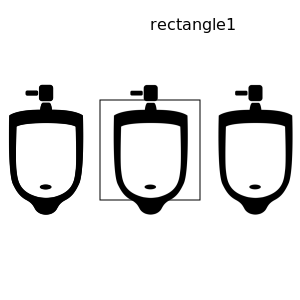

In [54]:
import svgutils.transform as st

template = st.fromfile('test.svg')
static_svg = st.fromfile('URINAL-ILL.SVG')
template.append(static_svg)
template.save('merged.svg')
show_svg('merged.svg')

# No-one to one person

438.0
[ 0.47031963  0.12557078  0.40410959]


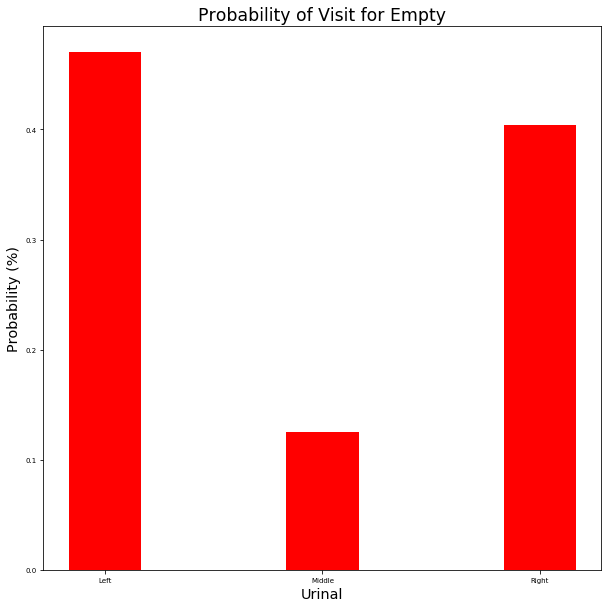

In [111]:
plt.rcParams['figure.figsize'] = (10,10)
tri_states = ["000","100","010","001","110","011","101","111"]
zero2one = []
one2zero = []
zeroone = []
for i in range(1,4):
    zero2one.append(state_changes_df.loc[tri_states[0]+tri_states[i]][0])
#     one2zero.append(state_changes_df.loc[tri_states[i]+tri_states[0]][0])

# zero2one.append(one2zero)
print(sum(zero2one))

zeroone = zero2one/sum(zero2one)
print(zeroone)
# zero2one

N = 3.0
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
zeroone = ax.bar(ind, zeroone, width, color='r')


ax.set_xlabel('Urinal')
ax.set_ylabel('Probability (%)')
ax.set_title('Probability of Visit for Empty')
ax.set_xticks(ind)
ax.set_xticklabels(('Left', 'Middle', 'Right'));

# rects = ax.patches

# # Now make some labels
# labels = [zeroone[i] % i for i in xrange(len(rects))]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')
# zeroone[0]

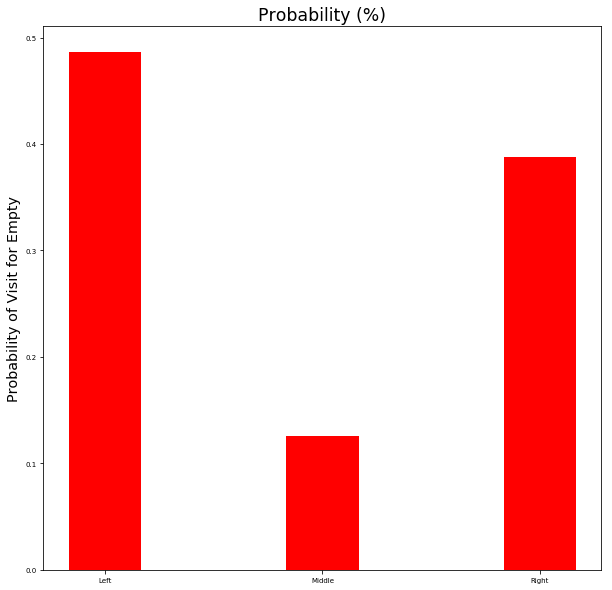

In [112]:
one2zero = []
for i in range(1,4):
    one2zero.append(state_changes_df.loc[tri_states[i]+tri_states[0]][0])

one2zero = one2zero/sum(one2zero)
one2zero

N = 3.0
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, one2zero, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')
ax.set_xticks(ind);
ax.set_xticklabels(('Left', 'Middle', 'Right'));

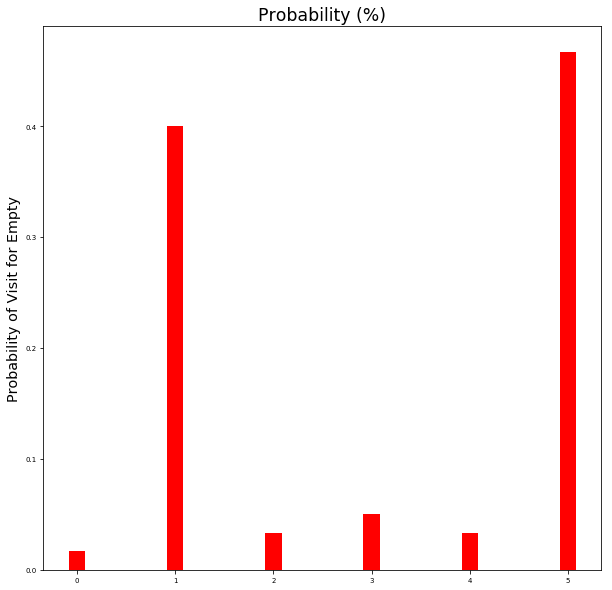

In [114]:

one2two = []
for i in range(1,4):
    for j in range(4,7):
        try:
            one2two.append(state_changes_df.loc[tri_states[i]+tri_states[j]][0])
        except:
            pass
        
one2two = one2two/sum(one2two)
one2two 

N = float(len(one2two))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, one2two, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')
ax.set_xticks(ind);
# ax.set_xticklabels(('Left', 'Middle', 'Right'))

Text(0.5,1,u'Probability (%)')

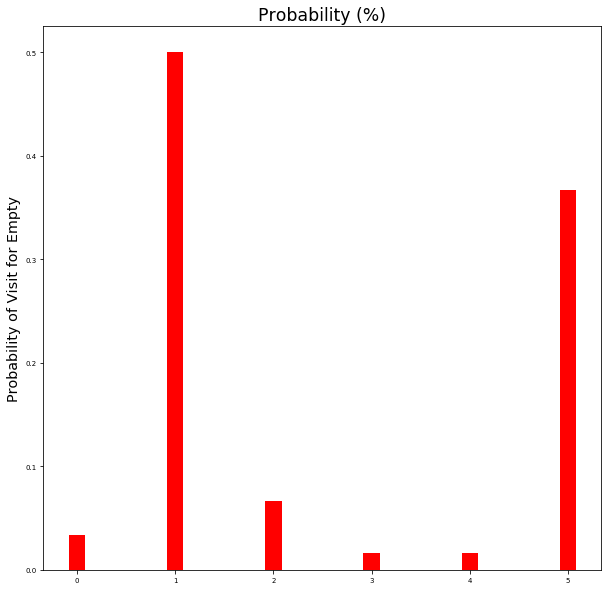

In [115]:

two2one = []
for i in range(1,4):
    for j in range(4,7):
        try:
            two2one.append(state_changes_df.loc[tri_states[j]+tri_states[i]][0])
        except:
            pass
two2one = two2one/sum(two2one)
two2one

N = float(len(two2one))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, two2one, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

Text(0.5,1,u'Probability (%)')

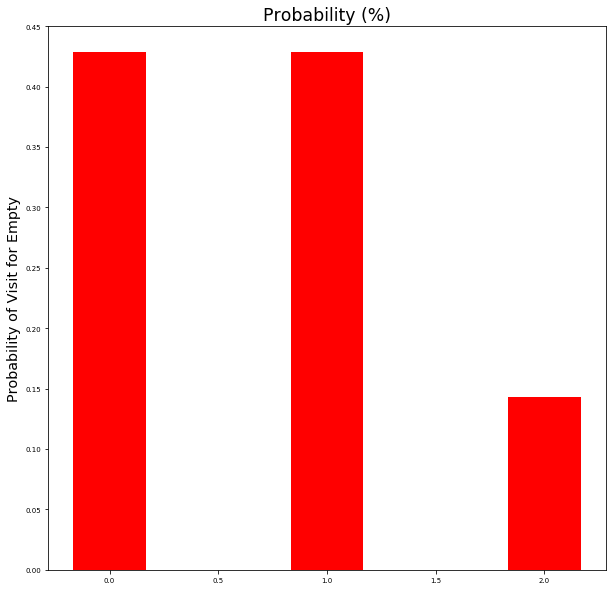

In [116]:

two2three = []
for i in range(4,7):
    two2three.append(state_changes_df.loc[tri_states[i]+tri_states[7]][0])
        
two2three = two2three/sum(two2three)
two2three

N = float(len(two2three))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, two2three, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

Text(0.5,1,u'Probability (%)')

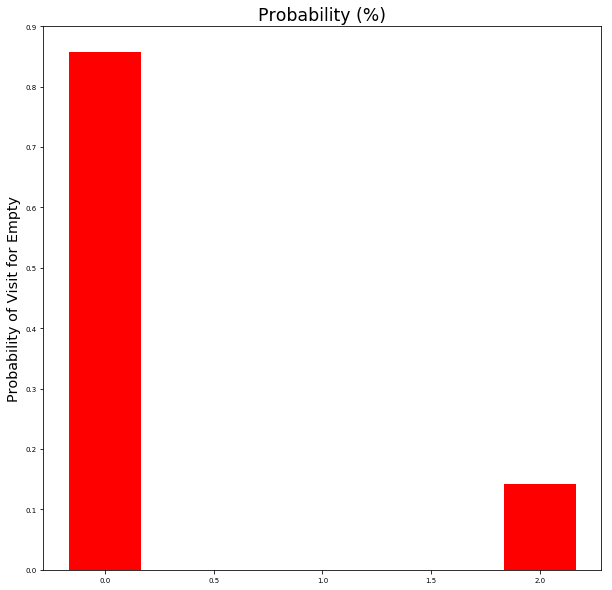

In [117]:

three2two = []
for i in range(4,7):
    three2two.append(state_changes_df.loc[tri_states[7]+tri_states[i]][0])
        
three2two = three2two/sum(three2two)
three2two

N = float(len(three2two))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, three2two, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

# ax.set_xticklabels(('Left', 'Middle', 'Right'))

# Get mean Temp for every frame

In [301]:

# from tqdm import tqdm
# tqdm.monitor_interval = 0
tqdm.pandas(tqdm())

temp_inst = df.iloc[:,1:].progress_apply(np.mean,axis=1)
# temp_instantaneous = []
# for row in tqdm_notebook(df.iterrows()):
#     print(df.loc[row,"P0":"P63"])
#     temp_instantaneous.append(df.loc[row,"P0":"P63"]mean())


0it [00:00, ?it/s]
  3%|▎         | 95957/3652338 [00:56<16:22, 3620.41it/s]


  5%|▌         | 186234/3652338 [01:25<15:48, 3653.03it/s]


  8%|▊         | 291560/3652338 [01:54<14:20, 3904.67it/s]


 11%|█         | 397813/3652338 [02:22<13:50, 3921.07it/s]


 14%|█▎        | 501970/3652338 [02:50<14:07, 3716.23it/s]


 16%|█▋        | 595710/3652338 [03:19<16:05, 3165.29it/s]


 19%|█▉        | 697824/3652338 [03:47<13:26, 3665.08it/s]


 22%|██▏       | 802297/3652338 [04:15<12:46, 3719.26it/s]


 25%|██▍       | 908006/3652338 [04:43<12:42, 3598.18it/s]


 28%|██▊       | 1011955/3652338 [05:12<17:52, 2462.32it/s]


 31%|███       | 1117342/3652338 [05:39<11:21, 3719.02it/s]


 33%|███▎      | 1219163/3652338 [06:07<11:54, 3406.82it/s]


 36%|███▌      | 1322772/3652338 [06:35<10:33, 3676.32it/s]


 39%|███▉      | 1427928/3652338 [07:03<09:57, 3724.02it/s]


 42%|████▏     | 1531993/3652338 [07:31<09:13, 3828.82it/s]


 45%|████▍     | 1638249/3652338 [07:58<08:27, 3972.12it/s]


 48%|████▊     | 1744950/3652338 [08:26<08:02, 3951.00it/s]


 51%|█████     | 1851091/3652338 [08:54<07:46, 3864.61it/s]


 54%|█████▎    | 1955088/3652338 [09:22<07:22, 3839.67it/s]


 56%|█████▋    | 2060639/3652338 [09:49<08:53, 2984.52it/s]


 59%|█████▉    | 2165124/3652338 [10:17<06:19, 3916.30it/s]


 62%|██████▏   | 2269266/3652338 [10:45<05:45, 3997.96it/s]


 65%|██████▍   | 2365499/3652338 [11:13<11:41, 1834.18it/s]


 68%|██████▊   | 2468862/3652338 [11:41<04:55, 3998.72it/s]


 70%|███████   | 2572953/3652338 [12:08<04:43, 3804.86it/s]


 73%|███████▎  | 2679335/3652338 [12:36<04:19, 3751.73it/s]


 76%|███████▌  | 2783559/3652338 [13:04<04:32, 3191.24it/s]


 79%|███████▉  | 2876862/3652338 [13:32<03:24, 3794.85it/s]


 82%|████████▏ | 2983856/3652338 [14:00<02:58, 3749.44it/s]


 85%|████████▍ | 3090444/3652338 [14:27<02:32, 3695.43it/s]


 88%|████████▊ | 3197484/3652338 [14:55<01:59, 3802.67it/s]


 90%|█████████ | 3298864/3652338 [15:23<01:39, 3566.08it/s]


 93%|█████████▎| 3406051/3652338 [15:51<01:03, 3901.37it/s]


 96%|█████████▌| 3512949/3652338 [16:18<00:37, 3721.21it/s]


 99%|█████████▉| 3619735/3652338 [16:46<00:08, 3804.39it/s]


100%|██████████| 3652338/3652338 [16:56<00:00, 3592.68it/s]

<IPython.core.display.Javascript object>

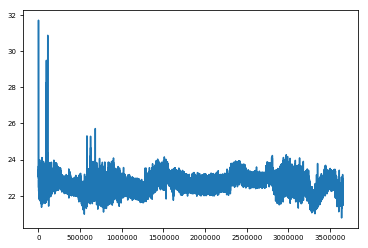

In [315]:
# plt.plot(temp_inst.rolling(window=80).mean())
plt.plot(temp_inst)

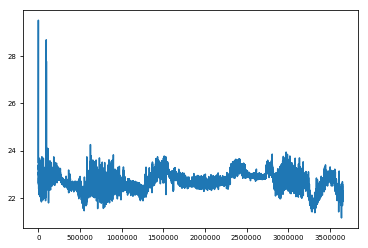

In [321]:
plt.plot(temp_inst.rolling(window=80).mean())

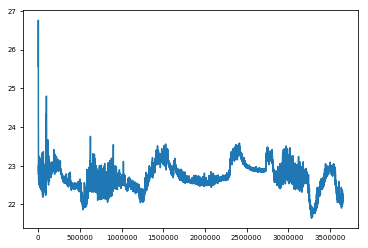

In [325]:
plt.plot(temp_inst.rolling(window=600).mean())

In [373]:
check = 97650
chend = 3500000
    
temp_inst.iloc[check:chend][temp_inst.iloc[check:chend]>24]
# temp_inst.iloc[1100:]

97651      24.039062
97653      24.054688
97654      24.203125
97656      24.078125
97661      24.031250
97662      24.050781
97663      24.218750
97665      24.058594
97672      24.148438
107347     24.062500
107350     24.019531
107352     24.066406
107355     24.109375
107356     24.089844
107358     24.113281
107359     24.140625
107361     24.128906
107363     24.089844
107364     24.265625
107365     24.085938
107366     24.023438
107367     24.160156
107368     24.214844
107369     24.003906
107370     24.121094
107372     24.144531
107373     24.171875
107374     24.097656
107375     24.164062
107377     24.007812
             ...    
2973831    24.097656
2973832    24.113281
2973833    24.035156
2973834    24.253906
2973835    24.011719
2973836    24.269531
2973837    24.039062
2973839    24.242188
2973840    24.023438
2973843    24.164062
2989629    24.152344
2989634    24.042969
2989638    24.011719
2989640    24.031250
2989641    24.042969
2989648    24.070312
2989649    24

# get mean median and sum of each pixel

In [ ]:
sum1 = []
mean1 = []
median1 = []
norm = 3652340
for i in tnrange(1,65):
    sum1.append(df.iloc[:,i].sum())
    mean1.append(df.iloc[:,i].mean())
    median1.append(df.iloc[:,i].median())
    


In [ ]:
np.mean(mean1)

In [ ]:
# norm = len(df.iloc[:,2])

# sum1_norm = [sum1[i]/norm for i in range(len(sum1))]
# sum1_norm1 = [sum1[i]/1000000 for i in range(len(sum1))]

mean_df = pd.DataFrame({'col':mean1})
mean_df = np.flip((np.array(mean_df).reshape(8,8).astype('float').T),0)
# sum_df = sum_df.values.reshape(8,8).astype('float')
sns.heatmap(mean_df)#, vmin=22, vmax=27)

# Zero Mean each pixel

In [ ]:
centred = []
df_mean = pd.DataFrame()
for i in tnrange(1,65):
    centred = df.iloc[:,i] - mean1[i-1]
    df_mean = df_mean.append(pd.Series(centred),ignore_index=True)




In [ ]:
df_mean = df_mean.T

In [ ]:
df_mean

In [ ]:
cMean = []
for i in tnrange(64):
    cMean.append(df_mean.iloc[:,i].mean())
    
# for i in tnrange(1,65):
#     sum1.append(df.iloc[:,i].sum())
#     mean1.append(df.iloc[:,i].mean())
# df_mean.iloc[:,10].mean()

In [ ]:
cMean_df = pd.DataFrame({'col':cMean})
cMean_df = cMean_df.values.reshape(8,8).astype('float')
sns.heatmap(cMean_df)#, vmin=22, vmax=27)

In [ ]:
from scipy.interpolate import griddata
import math


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = cMean
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0, vmin=0, vmax=1.6e-15)

In [ ]:


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = mean1
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [ ]:
# pd.rolling_window(pd.DataFrame(sample[3:, 1:3]), window=3).count()
frames = []
# for row in df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:].iterrows():
#     frames.append(np.array(row[1:]).reshape(8,8).astype('float'))
#     print(pd.Series(row[1:]).values.reshape(8,8))
df_chunk = df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:]
# df_chunk.iloc[:,0]
for i in range(64):
    frames.append(df_chunk.iloc[:,i].mean())

In [ ]:
points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = frames
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [ ]:
fig = plt.figure()
data = frames[0]
# sns.heatmap(data, linewidths=0.5, annot=True)
def init():
    h_init = sns.heatmap(np.zeros((8, 8)), linewidths=0.5, annot=True, vmin=22, vmax=27)
    type(h_init)
    return [h_init]
def animate(i):
    plt.clf()
    data = frames[i]
    h_curr = sns.heatmap(data, linewidths=0.5, annot=True, vmin=22, vmax=27)
    return h_curr
#init()
animate(599)

In [ ]:
start_time = timeit.default_timer()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600, interval=60, repeat=True,blit=True)
elapsed = timeit.default_timer() - start_time
print(elapsed)

In [ ]:
start_time = timeit.default_timer()
anim.save('mymovie.mp4',fps=10)
elapsed = timeit.default_timer() - start_time
print(elapsed)
plt.close(fig)

In [ ]:
start_time = timeit.default_timer()
HTML(anim.to_html5_video())
elapsed = timeit.default_timer() - start_time
print(elapsed)

# TRAINING DATA

# Create Videos
## (Skip as time consuming and saved to file)

## Need to implent loading video from file

In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('test.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

<IPython.core.display.Javascript object>


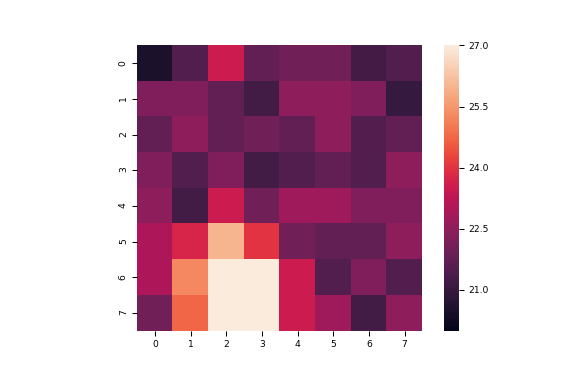

In [281]:
# Low res animation
%matplotlib nbagg
fig = plt.figure()
# plt.rcParams['animation.writer'] = 'avconv'


def init():
    sns.heatmap(np.zeros((8, 8)),vmin=20,vmax=27)

def animate(i):
    plt.clf()
    data = frames1[i]
    sns.heatmap(data, vmin=20,vmax=27,square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames1), interval = 10, repeat = True,blit=True)

# HTML(anim.to_html5_video())
# anim._repr_html_() is None
# rc('animation', html='html5')
# anim
# plt.rcParams['animation.writer'] = 'avconv'
# anim.save('MovWave.mp4', codec='h264')

<IPython.core.display.Javascript object>


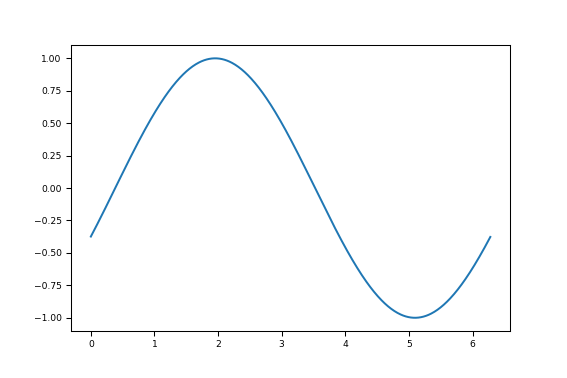

In [264]:
%matplotlib nbagg
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)        # x-array
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x+i/10.0))  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
    interval=25, blit=True)

In [241]:
frames1

[array([[ 21.5 ,  22.25,  21.75,  20.75,  23.5 ,  23.  ,  21.  ,  20.75],
        [ 20.75,  21.75,  22.  ,  22.75,  22.  ,  22.5 ,  22.  ,  21.25],
        [ 21.  ,  21.75,  21.  ,  21.5 ,  22.25,  21.  ,  21.25,  20.75],
        [ 20.75,  22.25,  22.25,  21.25,  21.25,  20.75,  21.  ,  22.  ],
        [ 21.75,  22.  ,  22.75,  22.  ,  22.  ,  22.  ,  21.25,  20.  ],
        [ 22.75,  23.75,  26.75,  24.  ,  22.  ,  22.  ,  22.  ,  21.25],
        [ 23.  ,  25.5 ,  27.25,  27.  ,  22.25,  21.25,  21.25,  20.25],
        [ 22.5 ,  24.25,  28.  ,  26.  ,  24.  ,  21.5 ,  22.75,  21.75]]),
 array([[ 22.25,  22.5 ,  22.5 ,  21.  ,  22.25,  22.75,  20.75,  21.75],
        [ 21.75,  22.  ,  22.25,  21.  ,  22.  ,  22.  ,  22.5 ,  22.75],
        [ 20.25,  22.25,  21.5 ,  22.25,  21.5 ,  21.75,  21.25,  21.5 ],
        [ 22.25,  21.  ,  22.25,  22.25,  22.25,  21.25,  21.75,  21.75],
        [ 22.25,  22.5 ,  22.25,  22.25,  22.25,  22.75,  22.5 ,  21.25],
        [ 23.  ,  23.5 ,  26.25,  24

In [ ]:
print(states_left,states_middle,states_right)
# states_left[0][1] - states_left[0][0]

In [ ]:
#entry wise product (Hadamard product)

In [ ]:
# from scipy import signal.savgol_filter
# y = savgol_filter(x, 5, 2)

In [ ]:
left = []
middle = []
right = []
df_temp_diffA = []
# x.append([1, 0, 1])
left = np.diff(df_tempMeans_thresh.iloc[:][0])
middle = np.diff(df_tempMeans_thresh.iloc[:][1])
right = np.diff(df_tempMeans_thresh.iloc[:][2])
df_temp_diffA.append(left)
df_temp_diffA.append(middle)
df_temp_diffA.append(right)
df_temp_diff1 = pd.DataFrame(df_temp_diffA)
df_temp_diff1 = df_temp_diff1.T

In [ ]:
assert df_temp_diff1.iloc[:,0].sum() == False


In [ ]:
for i in range(len(x)):
    print(x[i])

In [ ]:
df_temp_diff_test = df_tempMeans_thresh.diff()[1:]


In [252]:
plt.plot(df_temp_diff_test.iloc[:][0])
plt.plot(df_temp_diff_test.iloc[:][1])
plt.plot(df_temp_diff_test.iloc[:][2])
plt.show()

NameError: name 'df_temp_diff_test' is not defined